In [2]:
import pandas as pd
import datetime
from pandas import Series, DataFrame

In [5]:
data = pd.read_csv('~/Downloads/AAPL.csv')
data.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
174,2019-05-30,177.949997,179.229996,176.669998,178.300003,177.625122,21218400
249,2019-09-16,217.729996,220.130005,217.559998,219.899994,219.899994,21158100
29,2018-10-29,219.190002,219.690002,206.089996,212.240005,208.996857,45935500
9,2018-10-01,227.949997,229.419998,226.350006,227.259995,223.787323,23600800
164,2019-05-15,186.270004,191.750000,186.020004,190.919998,190.197357,26544700


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2019-09-12,224.800003,226.419998,222.860001,223.089996,223.089996,32226700
248,2019-09-13,220.000000,220.789993,217.020004,218.750000,218.750000,39763300
249,2019-09-16,217.729996,220.130005,217.559998,219.899994,219.899994,21158100
250,2019-09-17,219.960007,220.820007,219.119995,220.699997,220.699997,18318700
251,2019-09-18,221.059998,222.410004,220.679993,222.360001,222.360001,5459037


In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-18,217.789993,221.850006,217.119995,218.240005,214.905167,31571700
1,2018-09-19,218.500000,219.619995,215.300003,218.369995,215.033142,27123800
2,2018-09-20,220.240005,222.279999,219.149994,220.029999,216.667816,26608800
3,2018-09-21,220.779999,221.360001,217.289993,217.660004,214.334030,96246700
4,2018-09-24,216.820007,221.259995,216.630005,220.789993,217.416183,27693400


In [9]:
close_px = data['Adj Close']
mavg = close_px.rolling(window=100).mean()
print(mavg)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
          ...    
222    195.829867
223    195.990569
224    196.149358
225    196.286871
226    196.440511
227    196.572044
228    196.716401
229    196.927710
230    197.160846
231    197.391602
232    197.632951
233    197.859698
234    197.960657
235    198.086917
236    198.186503
237    198.286788
238    198.391109
239    198.498685
240    198.564745
241    198.682279
242    198.841507
243    198.996962
244    199.161318
245    199.312470
246    199

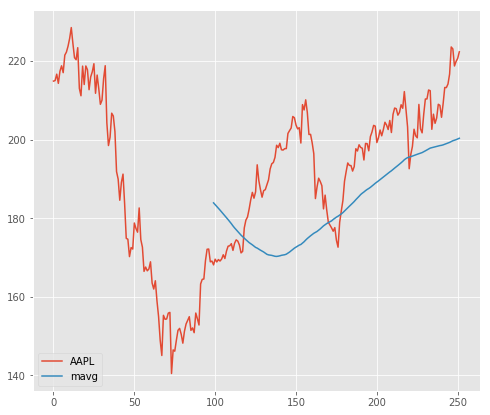

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

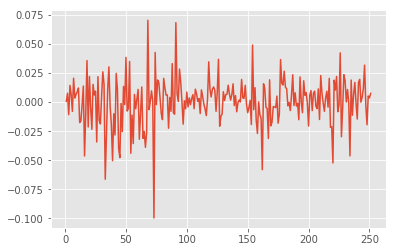

In [11]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [18]:
data_reg = data.loc[:,["Adj Close", "Volume"]]
data_reg["HL_PCT"] = (data["High"] - data["Low"]) / data["Close"] * 100.0
data_reg["PCT_change"] = (data["Close"] - data["Open"]) / data["Open"] * 100.0

In [23]:
# Drop missing value
data_reg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
import math
import numpy as np
from sklearn import preprocessing
forecast_out = int(math.ceil(0.01 * len(data_reg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = "Adj Close"
data_reg["label"] = data_reg[forecast_col].shift(-forecast_out)
X = np.array(data_reg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(data_reg['label'])
y = y[:-forecast_out]

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [30]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [32]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [38]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

In [39]:
print("The linear regression confidence is", confidencereg)

The linear regression confidence is 0.894472085714572


In [40]:
print("The quadratic regression 2 confidence is", confidencepoly2)
print("The quadratic regression 3 confidence is", confidencepoly3)
print("The KNN regression 2 confidence is", confidenceknn)

The quadratic regression 2 confidence is 0.8953649068614554
The quadratic regression 3 confidence is 0.8289395122411787
The KNN regression 2 confidence is 0.7949464146947978


In [43]:
forecast_set = clfreg.predict(X_lately)
data_reg['Forecast'] = np.nan

In [46]:
print(forecast_set)

[218.94014225 220.34350245 222.9024023 ]


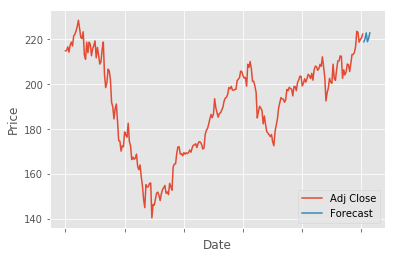

In [66]:
last_date = data_reg.iloc[-1].name
last_unix = last_date
next_unix = data_reg.iloc[-1].name + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    data_reg.loc[next_date] = [np.nan for _ in range(len(data_reg.columns)-1)]+[i]
data_reg['Adj Close'].tail(500).plot()
data_reg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()